In [ ]:
import math

def bellman_shortest_path(G, r, num):
    X, U, w = G  # X : ensemble des sommets, U : ensemble des arêtes, w : poids des arêtes
    A = {r}  # Ensemble des sommets atteints
    pi = {x: math.inf for x in X}  # Dictionnaire des distances
    pi[r] = 0  # La distance du sommet de départ est 0
    father = {}  # Dictionnaire pour stocker l'arbre enraciné

    for j in range(2, len(X) + 1):
        y = next(v for v in X if num[v] == j)  # Trouver le sommet correspondant à num[y] = j

        # Trouver le sommet x0 minimisant pi(x) + w(x, y)
        candidats = [(x, pi[x] + w[(x, y)]) for x in A if (x, y) in U]
        if not candidats:
            continue  # Si aucun chemin vers y, passer au sommet suivant
        x0, min_dist = min(candidats, key=lambda item: item[1])

        pi[y] = min_dist
        father[y] = x0
        A.add(y)

    return A, father, pi

In [86]:
import numpy as np
import math
C_1=100
C_2=1
L_max=2

def bellman_shortest_path_modified(G, r, num, pos):
    X, U, w = G  # X : ensemble des sommets, U : ensemble des arêtes, w : poids des arêtes
    A = {r}  # Ensemble des sommets atteints
    pi = {x: math.inf for x in X}  # Dictionnaire des distances
    pi[r] = 0  # La distance du sommet de départ est 0
    father = {}  # Dictionnaire pour stocker l'arbre enraciné

    l_max=np.zeros((len(X)+1,len(X)+1)) # Longueur max dans notre trajet
    l_max[0][0]=0 # longueur de 0 à 1 nulle
    nb_coudes= np.zeros(len(X)) # Nombre de coudes dans notre trajet

    father[r]="0" # Ajout du prédécesseur du point de départ

    for j in range(2, len(X) + 1):
        y = next(v for v in X if num[v] == j)  # Trouver le sommet correspondant à num[y] = j

        # Calcul de l_max et nb_coudes de x pour chaque predecesseur de y
        for x in A:
          if (x, y) in U :
            if (pos[father[x]][0]==pos[y][0]) | (pos[father[x]][1]==pos[y][1]): # Tester si le père de x et y sont alignés
              l_max[int(x)][int(y)]=l_max[int(father[x])][int(x)]+1 # Mise à jour de l_max de x en fonction de l_max de son père
            else :
              nb_coudes[int(x)]+=1
              l_max[int(x)][int(y)]=1

        # Trouver le sommet x0 minimisant la fonction de coût
        candidats = [(x, pi[x] + w[(x, y)] + C_1*(l_max[int(x)][int(y)]>L_max) + C_2*nb_coudes[int(x)]) for x in A if (x, y) in U]
        if not candidats:
            continue  # Si aucun chemin vers y, passer au sommet suivant
        x0, min_dist = min(candidats, key=lambda item: item[1])

        pi[y] = min_dist
        father[y] = x0
        A.add(y)

    return A, father, pi

In [ ]:
def bellman_shortest_path_modified(G, r, num, pos, obstacles):
    X, U, w = G  # X : ensemble des sommets, U : ensemble des arêtes, w : poids des arêtes
    A = {r}  # Ensemble des sommets atteints
    pi = {x: math.inf for x in X}  # Dictionnaire des distances
    pi[r] = 0  # La distance du sommet de départ est 0
    father = {}  # Dictionnaire pour stocker l'arbre enraciné

    l_max = np.zeros((len(X) + 1, len(X) + 1))  # Longueur max dans notre trajet
    l_max[0][0] = 0  # longueur de 0 à 1 nulle
    nb_coudes = np.zeros(len(X))  # Nombre de coudes dans notre trajet

    father[r] = "0"  # Ajout du prédécesseur du point de départ

    # Filtrer les arêtes pour exclure celles menant aux obstacles
    U = {edge for edge in U if edge[1] not in obstacles}

    for j in range(2, len(X) + 1):
        y = next((v for v in X if num[v] == j and v not in obstacles), None)  # Ignorer les obstacles
        if y is None:
            continue

        # Calcul de l_max et nb_coudes de x pour chaque prédécesseur de y
        for x in A:
            if (x, y) in U:
                if (pos[father[x]][0] == pos[y][0]) or (pos[father[x]][1] == pos[y][1]):  # Tester si le père de x et y sont alignés
                    l_max[int(x)][int(y)] = l_max[int(father[x])][int(x)] + 1  # Mise à jour de l_max de x en fonction de l_max de son père
                else:
                    nb_coudes[int(x)] += 1
                    l_max[int(x)][int(y)] = 1

        # Trouver le sommet x0 minimisant la fonction de coût
        candidats = [(x, pi[x] + w.get((x, y), math.inf)) for x in A if (x, y) in U]
        if not candidats:
            continue  # Si aucun chemin vers y, passer au sommet suivant
        x0, min_dist = min(candidats, key=lambda item: item[1])

        pi[y] = min_dist
        father[y] = x0
        A.add(y)

    return A, father, pi

In [39]:
# Exemple d'utilisation
pos = {"0":(0, -1), "1": (0, 0), "2": (0, 1), "3": (0, 2), "4": (1, 2), "5": (1, 1), "6": (1, 0), "7": (2, 0), "8": (2, 1), "9": (2, 2), "10": (3, 2), "11": (3, 1), "12": (3, 0), "13": (4, 0), "14": (4, 1), "15": (4, 2)}  # Positionnement automatique des nœuds
graph = (
    {str(i) for i in range(1, 16)},
    {("1", "2"), ("2", "3"), ("1", "6"), ("2", "5"), ("4", "5"), ("5", "6"), ("3", "4"), ("4", "9"), ("5", "8"), ("6", "7"), ("7", "8"), ("8", "9"), ("9", "10"), ("8", "11"), ("7", "12"), ("10", "15"), ("11", "14"), ("10", "11"), ("11", "12"), ("12", "13"), ("13", "14"), ("14", "15")},
    {edge: 1 for edge in {("1", "2"), ("2", "3"), ("1", "6"), ("2", "5"), ("4", "5"), ("5", "6"), ("3", "4"), ("4", "9"), ("5", "8"), ("6", "7"), ("7", "8"), ("8", "9"), ("9", "10"), ("8", "11"), ("7", "12"), ("10", "15"), ("11", "14"), ("10", "11"), ("11", "12"), ("12", "13"), ("13", "14"), ("14", "15")}}
)
num = {str(i): i for i in range(1, 16)}

A, father, pi = bellman_shortest_path_modified(graph, "1", num, pos)
print("Sommets atteints:", A)
print("Pères des sommets:", father)
print("Distances minimales:", pi)

# Tracer le plus court chemin de A à D
path = []
current = "15"
while current in father:
    path.append(current)
    current = father[current]
path.reverse()
print("Plus court chemin de 1 à 15 :", " -> ".join(path))

Sommets atteints: {'6', '3', '12', '7', '5', '10', '4', '8', '1', '2', '11', '13', '14', '15', '9'}
Pères des sommets: {'1': '0', '2': '1', '3': '2', '4': '3', '5': '2', '6': '1', '7': '6', '8': '7', '9': '4', '10': '9', '11': '8', '12': '11', '13': '12', '14': '13', '15': '14'}
Distances minimales: {'6': 2.0, '3': 102.0, '12': 109.0, '7': 103.0, '5': 3.0, '10': 307.0, '4': 104.0, '8': 105.0, '1': 0, '2': 1.0, '11': 107.0, '13': 111.0, '14': 113.0, '15': 214.0, '9': 206.0}
Plus court chemin de 1 à 15 : 1 -> 6 -> 7 -> 8 -> 11 -> 12 -> 13 -> 14 -> 15


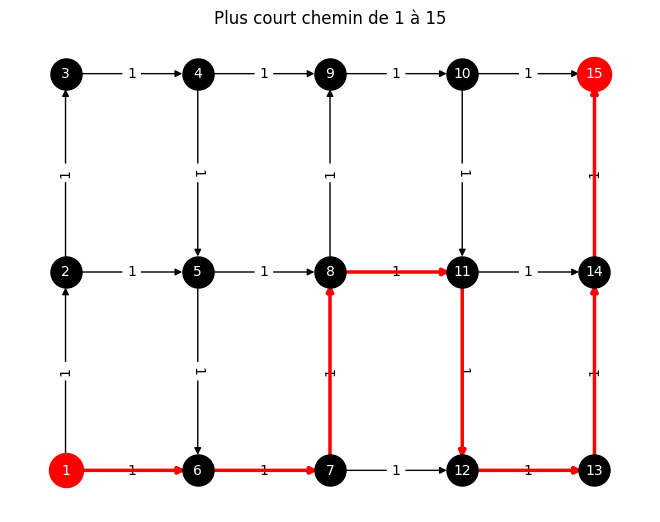

In [35]:
# Visualisation avec Matplotlib
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(graph[0])
G.add_edges_from(graph[1])

pos = {"0":(0, -1), "1": (0, 0), "2": (0, 1), "3": (0, 2), "4": (1, 2), "5": (1, 1), "6": (1, 0), "7": (2, 0), "8": (2, 1), "9": (2, 2), "10": (3, 2), "11": (3, 1), "12": (3, 0), "13": (4, 0), "14": (4, 1), "15": (4, 2)}  # Positionnement automatique des nœuds
nx.draw(G, pos, with_labels=True, node_color='black', node_size=500, font_size=10, font_color='white', edge_color='black', arrows=True)
labels = {(u, v): graph[2][(u, v)] for u, v in graph[1]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Colorier le plus court chemin
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)
nx.draw_networkx_nodes(G, pos, nodelist=["1", "15"], node_color='red', node_size=600)
plt.title("Plus court chemin de 1 à 15")
plt.show()

Sommets atteints: {'25', '24', '7', '17', '4', '1', '27', '13', '19', '30', '20', '6', '33', '11', '26', '34', '14', '35', '31', '28', '12', '23', '10', '18', '36', '15', '29', '9', '16', '3', '5', '32', '8', '2', '22', '21'}
Pères des sommets: {'1': '0', '2': '1', '3': '2', '4': '3', '5': '4', '6': '5', '7': '6', '8': '7', '9': '8', '10': '1', '11': '10', '12': '3', '13': '12', '14': '13', '15': '14', '16': '15', '17': '16', '18': '17', '19': '10', '20': '19', '21': '12', '22': '21', '23': '14', '24': '23', '25': '24', '26': '25', '27': '26', '28': '19', '29': '28', '30': '21', '31': '30', '32': '23', '33': '32', '34': '25', '35': '34', '36': '35'}
Distances minimales: {'25': 12.0, '24': 11.0, '7': 406.0, '17': 310.0, '4': 103.0, '1': 0, '27': 214.0, '13': 6.0, '19': 4.0, '30': 108.0, '20': 6.0, '6': 305.0, '33': 13.0, '11': 4.0, '26': 113.0, '34': 14.0, '14': 7.0, '35': 16.0, '31': 110.0, '28': 106.0, '12': 4.0, '23': 9.0, '10': 2.0, '18': 411.0, '36': 17.0, '15': 108.0, '29': 108.0,

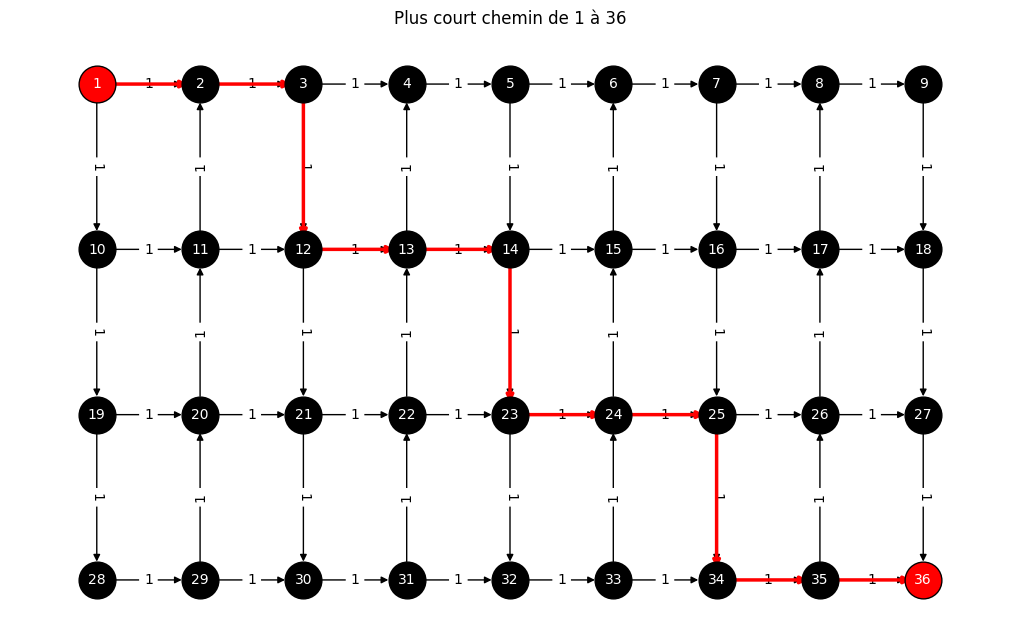

In [92]:
import matplotlib.pyplot as plt
import networkx as nx

# Taille de la grille
n=4
m=9

def generate_graph(rows, cols):
    pos = {str(i * cols + j + 1): (j, -i) for i in range(rows) for j in range(cols)}
    edges = set()

    for i in range(rows):
        for j in range(cols):
            node = str(i * cols + j + 1)
            if j < cols - 1:
                edges.add((node, str(i * cols + j + 2)))  # Connexion horizontale
            if i < rows - 1:
                if j % 2 == 0:
                    edges.add((node, str((i + 1) * cols + j + 1)))  # Connexion vers le bas
                else:
                    edges.add((str((i + 1) * cols + j + 1), node))  # Connexion vers le haut

    weights = {edge: 1 for edge in edges}

    graph = ({str(i + 1) for i in range(rows * cols)}, edges, weights)
    return graph, pos

graph, pos = generate_graph(n, m)  # Grille nxm
pos = {"0":(-1, 0),**pos} # Ajout du point 0

num = {str(i): i for i in range(1, n*m+1)} # Numérotation topologique

A, father, pi = bellman_shortest_path_modified(graph, "1", num, pos)
print("Sommets atteints:", A)
print("Pères des sommets:", father)
print("Distances minimales:", pi)

# Tracer le plus court chemin
path = []
current = str(n*m)
while current in father:
    path.append(current)
    current = father[current]
path.reverse()
print(f"Plus court chemin de 1 à {str(n*m)} :", " -> ".join(path))

# Visualisation du graphe avec Matplotlib
G = nx.DiGraph()
G.add_nodes_from(graph[0])
G.add_edges_from(graph[1])

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='black', node_size=700, font_size=10, font_color='white', edge_color='black', arrows=True)
labels = {(u, v): graph[2][(u, v)] for u, v in graph[1]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Colorier le plus court chemin
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)
nx.draw_networkx_nodes(G, pos, nodelist=["1", str(n*m)], node_color='red', node_size=600)
plt.title(f"Plus court chemin de 1 à {str(n*m)}")
plt.show()

In [91]:
noeud='24'
print(pi[noeud])
father[noeud]


8.0


'23'